# K-Means (CSV) Model

Generating a cluster graphic from csv source.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# define o tipo de cálculo a ser utilizado (median, average, etc)
def fillMissingData(X, column):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,column:column + 1] = imputer.fit_transform(X[:,column:column + 1])
    return X

In [3]:
# carrega a base de dados de um arquivo csv

#df = pd.read_csv('csv/soma_maioria.csv', delimiter=',')
#df = pd.read_csv('csv/outros_estados1.csv', delimiter=',')
#df = pd.read_csv('csv/ementas_benchmark2.csv', delimiter=',')
df = pd.read_csv('csv/levantamento_requisitos.csv', delimiter=',')


# validação dos dados carregados
df.head()

,platform,type,login,course,test_cert,studant
0,Digital One Innovation,"100% Online, totalmente em Português.","Cadastro Obrigatório: Nome completo, e-mail, s...",Possibilita execução de cursos em trilhas.\nPo...,Permite a emissão de certificado.\nCertificado...,Apresenta dashboard do aluno: \r\nLayout com c...
1,Full Stack Open,"100% Online, Open Source (Creative Commons).\r\n",Não possui cadastro,"Possibilita execução de uma única trilha, divi...",Permite que os códigos dos exemplos práticos e...,Permite interação entre os alunos através de u...
2,Udacity,"100% Online, interface em Inglês e Português","Cadastro Obrigatório: Nome completo, e-mail, s...",Possibilita execução de cursos em trilhas (Ini...,Não permite a emissão de certificado para curs...,Não permite que o aluno escreva artigos e post...
3,Coursera,"100% Online, em Português","Cadastro Obrigatório: Nome completo, e-mail, s...","Possibilita execução de cursos em módulos, fil...",Não permite a emissão de certificado para curs...,Apresenta Sala de Aula do aluno: \r\nLayout li...
4,Brasil Mais Digital,"100% Online, em Português\r","Cadastro Obrigatório: Nome completo, e-mail, s...",Possibilita execução de mais de 35 cursos em m...,"Permite a emissão de certificado, contudo a em...",Apresenta Dashboard do aluno: \r\nLayout limpo...


In [14]:
#pré-processamento

#seleção das colunas a serem utilizadas
df_numpy = fillMissingData(df.to_numpy(), 4)
df_numpy[:, 4] = df_numpy[:, 4].astype("int")
df_numpy = fillMissingData(df_numpy, 5)
df_numpy[:, 5] = df_numpy[:, 5].astype("int")

#carrega o array com os dados
df.at[28, 'carga_horaria'] = df_numpy[28][4]
df.at[28, 'control'] = df_numpy[28][5]

#converte os valores para inteiro (se necessário)
df.control = df.control.astype("int")
df.carga_horaria = df.carga_horaria.astype("int")

# atribui os dados a uma variável - "X"
X = pd.DataFrame({'carga_horaria': df_numpy[:, 4], 'control': df_numpy[:, 5]})

# validação da variável com os dados
X.head()

,carga_horaria,control
0,4,90
1,6,90
2,8,90
3,4,90
4,4,90


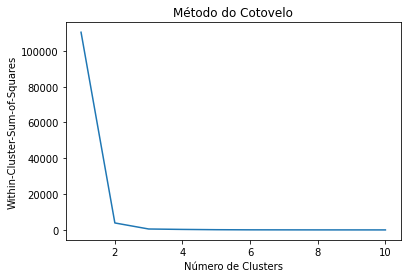

In [15]:
# definição do fator Within-Cluster-Sum-of-Squares (WCSS) para o cálculo do k (valor "cotovelo")
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 5000, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot do gráfico com o método Cotovelo para definição dos clusters mais adequados dado o banco de dados.

plt.plot(range(1, 11), wcss)
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares")
plt.show()

# K = 3

In [16]:
# definição das variáveis que realizam o cálculo dos clusters, com a inclusão do "K" definido anteriormente

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 50000, n_init = 10)
clusters = kmeans.fit_predict(X)

# mostra um array com a posição de cada linha do banco de dados e a que cluster ele pertence
clusters

array([0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [17]:
# função que mostra quais linhas fazem parte do cluster 0

df['Cluster'] = clusters
boolArray = df['Cluster'] == 1
df[boolArray]

,local,projeto,cursos,ementa,carga_horaria,control,Cluster
8,DISTRITO FEDERAL,UniSerpro Virtual,TRILHA DE INTRODUÇÃO À CIÊNCIA DE DADOS:\nRede...,- Análise de redes complexas\n- Laços fortes e...,10,31,1
9,SÃO PAULO,FUNDAÇÃO BRADESCO - Osasco,Administrando Bancos de Dados,A administração de bancos de dados é uma funçã...,15,31,1
10,SÃO PAULO,FUNDAÇÃO BRADESCO - Osasco,Android – Parte 1: Crie a sua primeira APP mobile,Este curso é composto por cinco aulas e uma sé...,10,31,1
11,SÃO PAULO,FUNDAÇÃO BRADESCO - Osasco,"Android – Parte 2: Avançando com listeners, me...",Este curso é composto por cinco aulas e uma sé...,10,31,1
12,SÃO PAULO,FUNDAÇÃO BRADESCO - Osasco,Desenvolvendo Aplicações Mobile com Android St...,Com o crescimento do mercado de dispositivos m...,15,31,1
14,SÃO PAULO,FUNDAÇÃO BRADESCO - Osasco,Fundamentos das Aplicações Móveis,"\nNo contexto tecnológico do Século 21, parte ...",12,31,1
15,SÃO PAULO,FUNDAÇÃO BRADESCO - Osasco,Fundamentos de COBIT® 4.1,COBIT® é uma sigla que corresponde a seguinte ...,16,31,1
16,SÃO PAULO,FUNDAÇÃO BRADESCO - Osasco,Fundamentos de Governança de TI,A Governança de TI é parte integrante da chama...,12,31,1
17,SÃO PAULO,FUNDAÇÃO BRADESCO - Osasco,Fundamentos de ITIL,"No Século 21, a Tecnologia da Informação (TI) ...",16,31,1
18,SÃO PAULO,FUNDAÇÃO BRADESCO - Osasco,Fundamentos de Lógica de Programação,A função principal de um computador é a execuç...,15,31,1


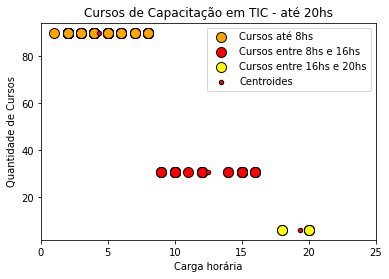

In [22]:
# função para separar os clusters a serem plotados e quais as configurações de visualização
x = X.to_numpy()

# cluster 0
plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1],s=100, c='orange',edgecolor='black',    label='Cursos até 8hs')


# cluster 1
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1],s=100, c='red',edgecolor='black',label='Cursos entre 8hs e 16hs')


# cluster 2
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1],s=100, c='yellow',edgecolor='black',    label='Cursos entre 16hs e 20hs')





# cluster 3
#plt.scatter(x[clusters == 3, 0], x[clusters == 3, 1],s=100, c='green',edgecolor='black',   label='Cursos acima de 160hs')


#cluster 4
#plt.scatter(x[clusters == 4, 0], x[clusters == 4, 1],s=300, c='pink',edgecolor='black',    label='Cursos com mais de 400hs')

# criando o gráficos com as centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=20, c='red',edgecolor='black',label='Centroides')

# ajuste da escala dos eixos x e y
#plt.ylim(0,25)
plt.xlim(0,25)

# legendas do gráfico
plt.title("Cursos de Capacitação em TIC - até 20hs")
plt.xlabel("Carga horária")
plt.ylabel("Quantidade de Cursos")

plt.legend(loc=1)
plt.show()